## LAB 9
### Podstawowy algorytm ewolucyjny

In [1]:
import numpy as np
from typing import Callable
import random
import matplotlib.pyplot as plt

### Założenia
- warunek stopu: liczba pokoleń (parametr: n_iter)
- krzyżowanie: jednopunktowe (parametr frakcji osobników krzyżowanych: p_crossover)
- mutacja: gaussowska (parametr frakcji mutowanych dzieci: p_mutation)
- selekcja: binarne turnieje pomiędzy osobnikami z pokolenia dzieci i ich rodziców
- liczność populacji: n_population
- minimalizowana funkcja: cost_function (input: numpy array reprezentujący osobnika)
- wymiar osobnika: problem_dimension (np. jeśli funkcja kosztu ma dziedzinę w $R^3$ to 3)

In [11]:
class Genetic:
    
    def __init__(self, 
                 cost_function: Callable,
                 problem_dimension: int,
                 n_population: int,
                 p_mutation: float,
                 p_crossover: float):
        
        self.cost_function = cost_function
        self.problem_dimension = problem_dimension
        self.n_population = n_population
        self.p_mutation = p_mutation
        self.p_crossover = p_crossover
        # Initialization of the population
        self.population = np.random.uniform(-10, 10, size=(n_population, problem_dimension))
        
    def fit(self, n_iter, best=True):
        """Execution of genetic algorithm.
        
        Stop condition: number of iterations.
        Crossover: one-point.
        Mutation: gaussian.
        Selection: binary tournaments, with parents, with replacement.
        """
        
        for i in range(n_iter):
            # Crossover
            size = np.floor(self.p_mutation*self.n_population)
            # Even number of individuals for crossover
            size = int(size - size%2)
            crossover_ids = np.random.choice(range(self.n_population), 
                                             size=size,
                                             replace=False)
            children = []
            for j in range(0, size-1, 2):
                # Switching ceil(half) parts of individuals
                point = int(np.ceil(self.problem_dimension/2))
                part_1 = self.population[crossover_ids[j]][:point]
                part_2 = self.population[crossover_ids[j+1]][point:]
                child = np.append(part_1, part_2)
                # Possible mutation
                if random.random()<self.p_mutation:
                    child = child + np.random.normal(size=(self.problem_dimension))
                children.append(child)
            
            # Combinig old and new generations
            children = np.array(children)
            both = np.append(self.population, children, axis=0)
            
            # Evaluation
            values = []
            for x in both:
                values.append(self.cost_function(x))
            
            # Selection
            new_population = []
            count = 0
            while count<self.n_population:
                ids = np.random.choice(range(len(both)), 
                                       size=2, 
                                       replace=False)
                if values[ids[0]]<=values[ids[1]]:
                    new_population.append(both[ids[0]])
                else:
                    new_population.append(both[ids[1]])
                count+=1
            
            self.population = np.array(new_population)
            
        if best:
            return (both[np.argmin(values)], np.min(values))
        else:
            # Evaluation
            values = []
            for x in self.population:
                values.append(self.cost_function(x))
            return values

In [3]:
# Funkcja kosztu zadana do minimalizacji
def problem1_fun(ind):
    return ind[0]**2+ind[1]**2+2*ind[2]**2

In [32]:
def cost_over_generations(n_iter, gen):
    """Plots behaviour of population over iterations of algorithm."""
    fig, ax = plt.subplots(figsize=(10, 7)) 
    for i in range(n_iter):
        r = gen.fit(1, best=False)
        ax.scatter([i]*len(r), r, c="blue")
    plt.axhline(y = 0, color = 'r', linestyle = '-')
    plt.title("Wartości funkcji kosztu dla populacji względem nr pokolenia.")
    plt.xlabel("Nr pokolenia")
    plt.ylabel("Wartości funkcji kosztu")
    plt.show()

## Porównanie działania algorytmu w zależności od wybranych parametrów
- **oczekiwany wynik**: minimum o wartości 0 w punkcie [0, 0, 0]
### Zestaw 1
- n_population: 200
- p_mutation: 0.2
- p_crossover: 0.7

In [34]:
gen1 = Genetic(problem1_fun, 3, 
               n_population=200, 
               p_mutation=0.2, 
               p_crossover=0.7)

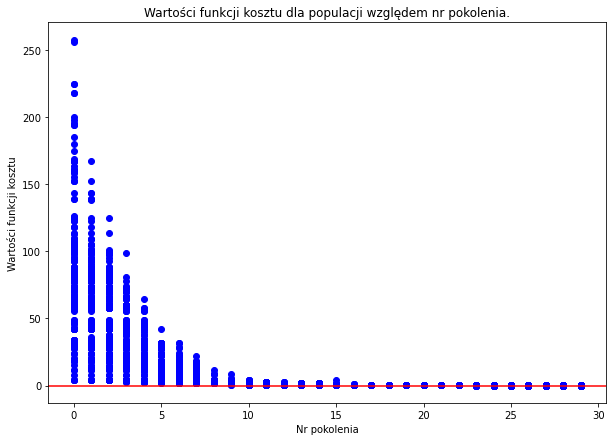

In [35]:
cost_over_generations(30, gen1)

### Zestaw 2
- n_population: 100
- p_mutation: 0.3
- p_crossover: 0.7

In [36]:
gen2 = Genetic(problem1_fun, 3, 
               n_population=100, 
               p_mutation=0.3, 
               p_crossover=0.7)

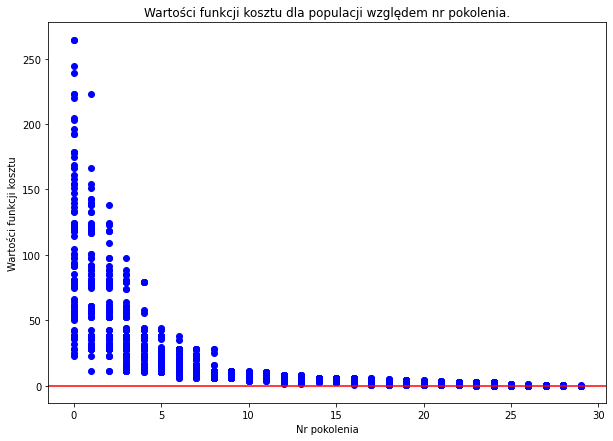

In [37]:
cost_over_generations(30, gen2)

### Zestaw 3
- n_population: 50
- p_mutation: 0.3
- p_crossover: 0.7

In [38]:
gen3 = Genetic(problem1_fun, 3, 
               n_population=50, 
               p_mutation=0.3, 
               p_crossover=0.7)

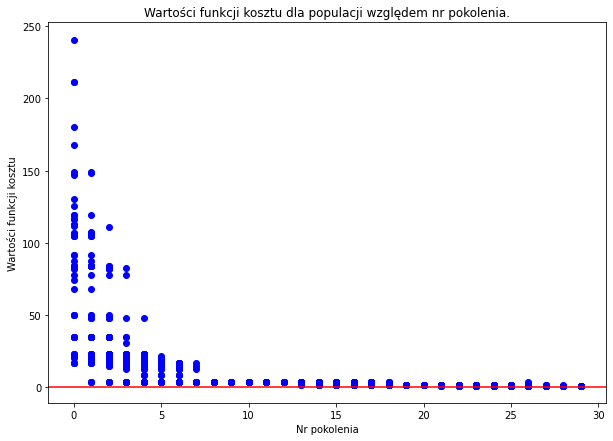

In [39]:
cost_over_generations(30, gen3)

### Zestaw 4
- n_population: 20
- p_mutation: 0.4
- p_crossover: 0.7

In [46]:
gen4 = Genetic(problem1_fun, 3, 
               n_population=20, 
               p_mutation=0.4, 
               p_crossover=0.7)

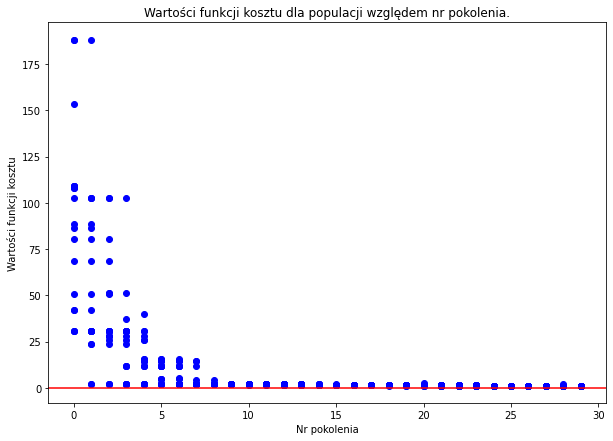

In [47]:
cost_over_generations(30, gen4)

## Wnioski
- zadanie minimalizacji podanej funkcji z przestrzeni $R^3$ okazało się proste dla zaimplemetowanego algorytmu genetycznego
- zmniejszając populację oraz jednocześnie zwiększając prawdopodobieństwo mutacji rozwiązania bliskie optymalnym można uzyskać dla stosunkowo niewielkiej populacji 20 osobników przy zaledwie ok. 15-20 iteracjach
- osiągnięcie wyniku z błędem rzędu 0.01 wymaga już większej liczby pokoleń ok. 40-50
- bardziej liczne populacje równie szybko osiągają optima dla części osobników, a ogólnie przy bardziej skomplikowanych zadaniach powinny być korzystniejsze 

## Wynik końcowy dla przykładowego modelu

In [78]:
gen = Genetic(problem1_fun, 3, 
               n_population=200, 
               p_mutation=0.2, 
               p_crossover=0.7)
gen.fit(50)

(array([-0.09699599,  0.02463511,  0.01628314]), 0.010545393058033618)